### Handwritten Digit classification using Neural Network
    - Using simple input and output layer( without hidden) identify the digit using neural network
    - Determine the performance using confusion matrix
    - Add hidden layer to validate performance change

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

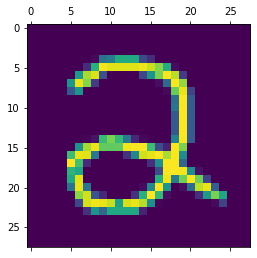

In [32]:
pyplot.matshow(x_train[2454])


In [33]:
y_train[2454]

2

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_train = x_train/255
x_test = x_test/255

In [36]:
y_train.shape

(60000,)

In [8]:
# flatten X_Train, X_Test
x_train_flattned = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [9]:
x_train_flattned[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train_flattned, y_train, epochs=5)
y_test

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9959


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
model.evaluate(x_test_flattened, y_test)
y_predicted = model.predict(x_test_flattened)
y_predicted

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9784


array([[1.8230408e-02, 4.4356366e-05, 1.7575216e-01, ..., 9.9997282e-01,
        1.0082471e-01, 1.5235659e-01],
       [6.4215362e-03, 2.7553216e-01, 9.9999976e-01, ..., 7.9705460e-06,
        7.4558222e-01, 3.6907910e-05],
       [1.3438463e-03, 9.9820042e-01, 8.5200071e-03, ..., 5.3346515e-02,
        1.4502436e-01, 5.8525801e-04],
       ...,
       [2.4317498e-07, 1.6194582e-04, 8.3317582e-07, ..., 5.4270846e-01,
        1.9938639e-01, 9.3641448e-01],
       [5.8008134e-03, 3.3978420e-06, 1.2008047e-04, ..., 7.2403178e-05,
        9.9897254e-01, 1.9742236e-05],
       [1.0114819e-02, 3.7004072e-06, 2.1299034e-02, ..., 9.9507201e-07,
        3.3642948e-03, 1.9121170e-04]], dtype=float32)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


Text(69.0, 0.5, 'Truth')

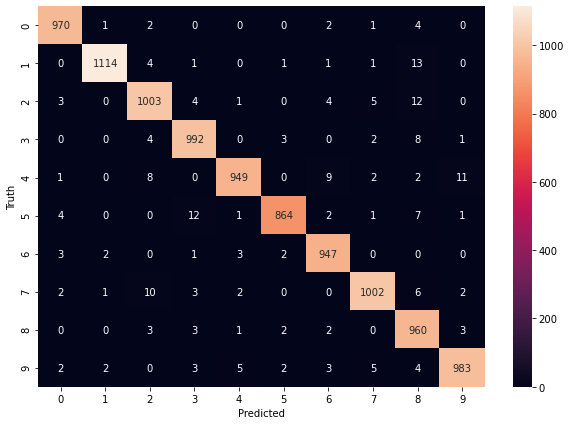

In [37]:

import seaborn as sn
pyplot.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
pyplot.xlabel('Predicted')
pyplot.ylabel('Truth')

### Use Hidden Layer

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattned, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2773 - accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1259 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0668 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9920: 0s - loss: 0.0248 - accuracy: 0.99
Epoch 10/10
1875/1875 [=======================

In [39]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.9772


[0.09055085480213165, 0.9771999716758728]

In [18]:
y_predicted = model.predict(x_test_flattened)
y_predicted

array([[1.8230408e-02, 4.4356366e-05, 1.7575216e-01, ..., 9.9997282e-01,
        1.0082471e-01, 1.5235659e-01],
       [6.4215362e-03, 2.7553216e-01, 9.9999976e-01, ..., 7.9705460e-06,
        7.4558222e-01, 3.6907910e-05],
       [1.3438463e-03, 9.9820042e-01, 8.5200071e-03, ..., 5.3346515e-02,
        1.4502436e-01, 5.8525801e-04],
       ...,
       [2.4317498e-07, 1.6194582e-04, 8.3317582e-07, ..., 5.4270846e-01,
        1.9938639e-01, 9.3641448e-01],
       [5.8008134e-03, 3.3978420e-06, 1.2008047e-04, ..., 7.2403178e-05,
        9.9897254e-01, 1.9742236e-05],
       [1.0114819e-02, 3.7004072e-06, 2.1299034e-02, ..., 9.9507201e-07,
        3.3642948e-03, 1.9121170e-04]], dtype=float32)

Text(69.0, 0.5, 'Truth')

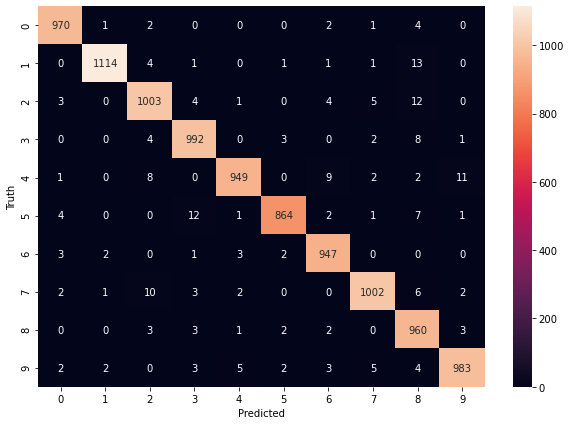

In [19]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

pyplot.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
pyplot.xlabel('Predicted')
pyplot.ylabel('Truth')